In [ ]:
%matplotlib inline

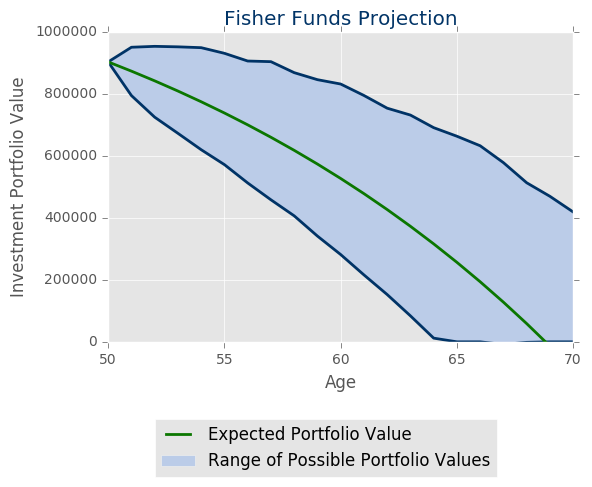

In [9]:
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
from operator import itemgetter
import pandas as pd
plt.style.use('ggplot')

def Projection(Saving,Balance,Age,End_Age,PIR,Strategy,ret_inc):
    Balance = int(Balance)
    Saving = int(Saving)
    ages = [n for n in range(Age,End_Age)]
    overall = []
    if Strategy == 'Conservative':
        risk = 0.02197
        if PIR == 0:
            rate = 0.0302
        elif PIR == 0.105:
            rate = 0.027
        elif PIR == 0.175:
            rate = 0.0026
        else:
            rate = 0.0236
    elif Strategy == 'Conservative Balanced':
        risk = 0.0368177
        if PIR == 0:
            rate = 0.0398
        elif PIR == 0.105:
            rate = 0.037
        elif PIR == 0.175:
            rate = 0.0351
        else:
            rate = 0.0323
    elif Strategy == 'Balanced':
        risk = 0.0544986
        if PIR == 0:
            rate = 0.0494
        elif PIR == 0.105:
            rate = 0.0462
        elif PIR == 0.175:
            rate = 0.0441
        else:
            rate = 0.0410
    elif Strategy == 'Balanced Growth':
        risk = 0.07298214
        if PIR == 0:
            rate = 0.0565
        elif PIR == 0.105:
            rate = 0.0531
        elif PIR == 0.175:
            rate = 0.0508
        else:
            rate = 0.0474
    else:
        risk = 0.09178467
        if PIR == 0:
            rate = 0.0636
        elif PIR == 0.105:
            rate = 0.06
        elif PIR == 0.175:
            rate = 0.0576
        else:
            rate = 0.0539
    for i in range(1000):
        balances = [Balance]
        for j in range(Age,End_Age):
            if balances[-1] > 0:
                ret = np.random.normal(rate,risk)
                balances.append((balances[-1] - ret_inc) * (1+ret) + Saving)
            else:
                balances.append(0)
        overall.append(balances)
    lowest = []
    middle = [Balance]
    highest = []
    for i in range(len(ages)):
        sorted_list = sorted(overall, key = lambda x: x[i])
        lowest.append(sorted_list[100][i])
        highest.append(sorted_list[900][i])
        middle.append((middle[-1] - ret_inc) * (1+rate) + Saving)
    middle.pop()
#     print(len(sorted_list))
#     print("Your expected value at the age of retirment ("+str(ret_age)+") is $" +str(int(middle[-1])))
#     print(len(ages)+1)
#     print(middle)
#     print(lowest)
#     print(highest)
    fig, ax = plt.subplots(1)
    ax.plot(ages, lowest, color = '#003366', lw = 2.0)
    ax.plot(ages, highest, color = '#003366', lw = 2.0)
    ax.plot(ages, middle, label = 'Expected Portfolio Value', color = '#0b7700', lw = 2.0)
    ax.fill_between(ages, lowest, highest, alpha = 1.0, label = "Range of Possible Portfolio Values" , facecolor = "#bbcce8")
    plt.legend(bbox_to_anchor=(0.1, -0.25), loc=2, borderaxespad=0.)
    ax.set_xlabel("Age")
    ax.set_ylabel("Investment Portfolio Value")
    ax.yaxis.tick_left
    plt.title("Fisher Funds Projection", color = "#003366")
    plt.xlim(Age,)
    plt.ylim(0,)
    plt.show()
        
  
interact(Projection, Strategy= widgets.Dropdown(options={'Conservative': 'Conservative','Conservative Balanced': 'Conservative Balanced', 'Balanced':'Balanced', 'Balanced Growth':'Balanced Growth','Growth':'Growth'},value='Balanced'), 
         Age = widgets.IntSlider(min=0,max=90,step=1,value=50,continuous_update=False, slider_color = "#003366", width = "70%"),
         End_Age = widgets.IntSlider(min=0,max=90,step=1,value=60,continuous_update=False, slider_color = "#003366", width = "70%"),
        Balance = widgets.Text("0", description = "Balance"),
        Saving = widgets.Text("0", description = "Saving"),
        ret_inc = widgets.IntSlider(min=0,max=250000,step=1000,value=0,continuous_update=False,description = 'Retirement Income',
                                    slider_color = "#003366", width = "70%"),
        PIR = widgets.Dropdown(options={'Low (10.5%)': (.105),'Mid (17.5%)':(0.175),'High (28%)':(0.28),'No Tax (0%)':(0)},description='PIR',value=(0))
        );